In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
fs = 16000

In [3]:
wav_data, _ = librosa.load(librosa.util.example_audio_file(), sr=fs, mono=True, duration=2)

In [12]:
def fig(wav_ori, wav_processed, title):
    plt.subplot(2, 2, 1)
    plt.title('语谱图')
    plt.specgram(wav_ori, Fs=fs, scale_by_freq=True, sides='default', cmap='jet')
    plt.subplot(2, 2, 2)
    plt.title('波形图')
    plt.plot(time, wav_ori)
    plt.subplot(2, 2, 3)
    plt.title('语谱图(%s)' % title)
    plt.specgram(wav_processed, Fs=fs, scale_by_freq=True, sides='default', cmap='jet')
    plt.subplot(2, 2, 4)
    plt.title('波形图(%s)' % title)
    plt.plot(time, wav_processed)
    plt.tight_layout()

## 语谱图和波形图

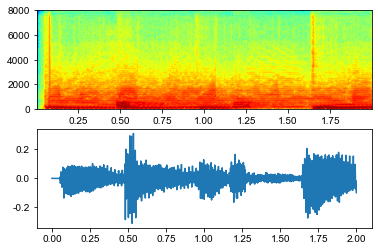

In [4]:
plt.subplot(2, 1, 1)
plt.specgram(wav_data, Fs=fs, scale_by_freq=True, sides='default', cmap='jet')
plt.subplot(2, 1, 2)
time = np.arange(0, len(wav_data)) * (1/fs)
plt.plot(time, wav_data)

## 添加白噪声

In [5]:
def add_noise(x, w=0.008):
    # w: 噪声因子
    output = x + np.random.normal(loc=1, scale=1, size=len(x)) * w
    return output

def add_noise2(x, snr):
    # snr：生成的语音信噪比
    P_signal = np.sum(abs(x) ** 2) / len(x)  # 信号功率
    P_noise = P_signal / 10 ** (snr / 10.0)  # 噪声功率
    return x + np.random.randn(len(x)) * np.sqrt(P_noise)
wave_augmentated = add_noise(wav_data)

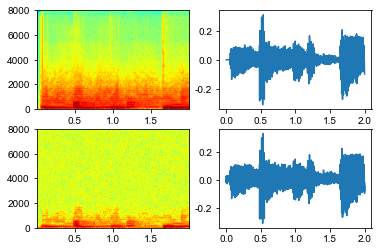

In [6]:
plt.subplot(2, 2, 1)
plt.specgram(wav_data, Fs=fs, scale_by_freq=True, sides='default', cmap='jet')
plt.subplot(2, 2, 2)
time = np.arange(0, len(wav_data)) * (1/fs)
plt.plot(time, wav_data)
plt.subplot(2, 2, 3)
plt.specgram(wave_augmentated, Fs=fs, scale_by_freq=True, sides='default', cmap='jet')
plt.subplot(2, 2, 4)
time = np.arange(0, len(wav_data)) * (1/fs)
plt.plot(time, wave_augmentated)

In [7]:
from scipy.io.wavfile import write

In [8]:
write('audio.wav', rate=fs, data=wav_data)
write('audio_augmentated.wav', rate=fs, data=wave_augmentated)

## 波形移位

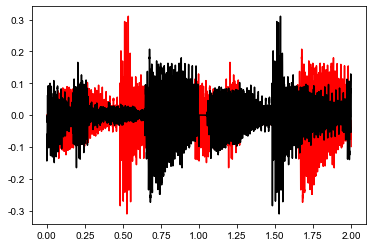

In [9]:
def time_shift(x, shift):
    return np.roll(x, int(shift))

plt.plot(time, wav_data, c='r')
plt.plot(time, time_shift(wav_data, time.shape[0]//2), c='k')

## 波形拉伸

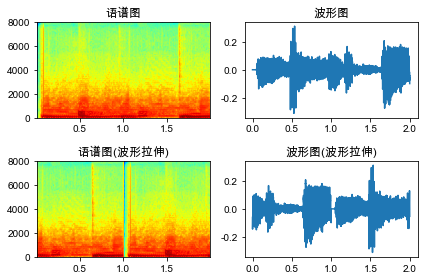

In [11]:
def time_stretch(x, rate):
    return librosa.effects.time_stretch(x, rate)

fig(wav_data, time_shift(wav_data, time.shape[0]//2), '波形拉伸')

## 音高修正

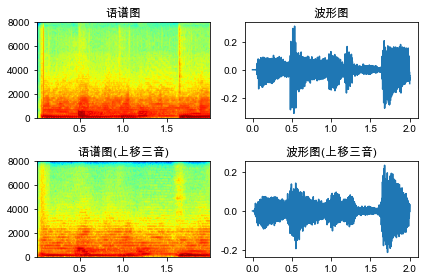

In [13]:
def pitch_shifting(x, sr, n_steps, bins_per_octave=12):
    return librosa.effects.pitch_shift(x, sr, n_steps, bins_per_octave=bins_per_octave)

# 向上移三音（如果bins_per_octave为12，则六步）
wav_augmented = pitch_shifting(wav_data, sr=fs, n_steps=6, bins_per_octave=12)
fig(wav_data, wav_augmented, '上移三音')

ref: https://www.cnblogs.com/LXP-Never/p/13404523.html